# 第一题

下载并用pandas导入sz50.xlsx的所有股票，索引设置为datetime，将所有股票的keys打印出来。

In [2]:
import pandas as pd
data=pd.read_excel('sz50.xlsx',sheetname=None, index_col='datetime')
print(data.keys())

C:\Users\70901\Anaconda3\lib\site-packages\pandas\io\excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


odict_keys(['600000.XSHG', '600016.XSHG', '600028.XSHG', '600029.XSHG', '600030.XSHG', '600036.XSHG', '600048.XSHG', '600050.XSHG', '600100.XSHG', '600104.XSHG', '600111.XSHG', '600340.XSHG', '600485.XSHG', '600518.XSHG', '600519.XSHG', '600547.XSHG', '600606.XSHG', '600837.XSHG', '600887.XSHG', '600919.XSHG', '600958.XSHG', '600999.XSHG', '601006.XSHG', '601088.XSHG', '601166.XSHG', '601169.XSHG', '601186.XSHG', '601198.XSHG', '601211.XSHG', '601229.XSHG', '601288.XSHG', '601318.XSHG', '601328.XSHG', '601336.XSHG', '601390.XSHG', '601398.XSHG', '601601.XSHG', '601628.XSHG', '601668.XSHG', '601688.XSHG', '601766.XSHG', '601788.XSHG', '601800.XSHG', '601818.XSHG', '601857.XSHG', '601881.XSHG', '601901.XSHG', '601985.XSHG', '601988.XSHG', '601989.XSHG'])


# 第二题

读取data里的600036这只股票的DataFrame,将其收盘价转换成用Numpy的Array格式，并用talib计算10日均线值，返回ndarray的最后五个值。

In [9]:
import numpy as np
import talib
#读取data里的600036这只股票的DataFrame
df=pd.DataFrame(data["600036.XSHG"])
#将其收盘价转换成用Numpy的Array格式
close=df['close'].values
#用talib计算10日均线
close_MA10=talib.MA((close), timeperiod=10)
print(type(close_MA10))
print(close_MA10[-5:])

<class 'numpy.ndarray'>
[108.35  108.741 109.176 110.102 111.666]


# 第三题

将MA的ndarray数据转换成Series格式，并将价格和MA值用Matplotlib展示出来

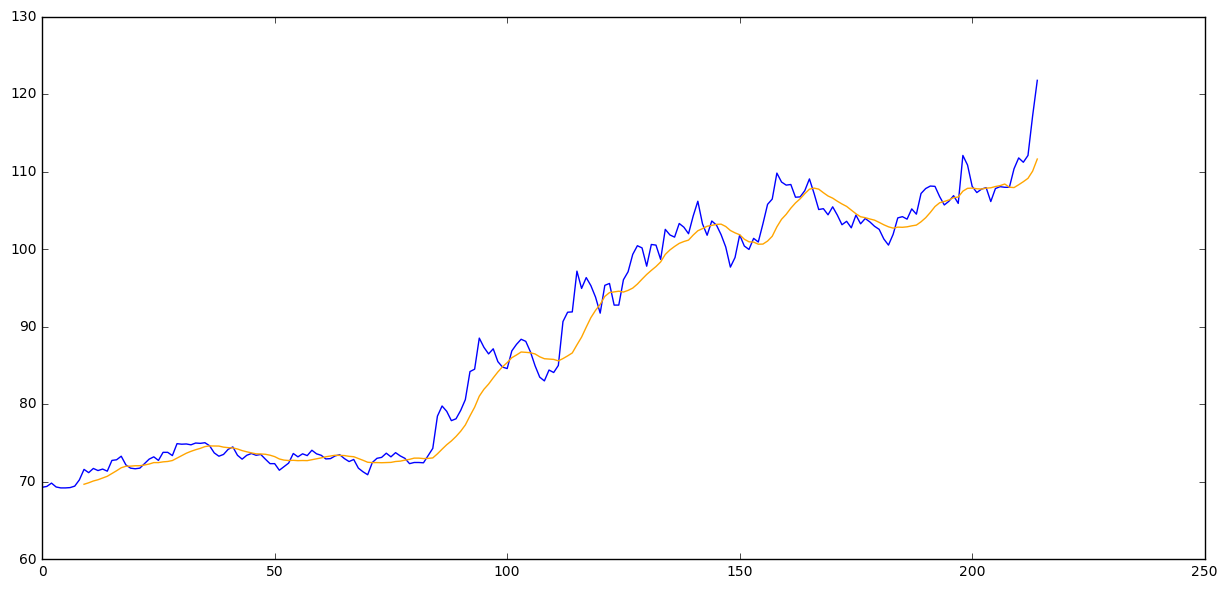

In [101]:
import matplotlib.pyplot as plt
close_MA10_s=pd.Series(close_MA10)
plt.figure(figsize=(15, 7))
plt.plot(close,color="blue")
plt.plot(close_MA10_s,color="orange")
plt.show()

# 第四题

用talib计算50只股票的周期为5的ROCR100，生成Dataframe，并将前5只股票的 ROCR100（参数timeperiod=20）用一张图显示出来。

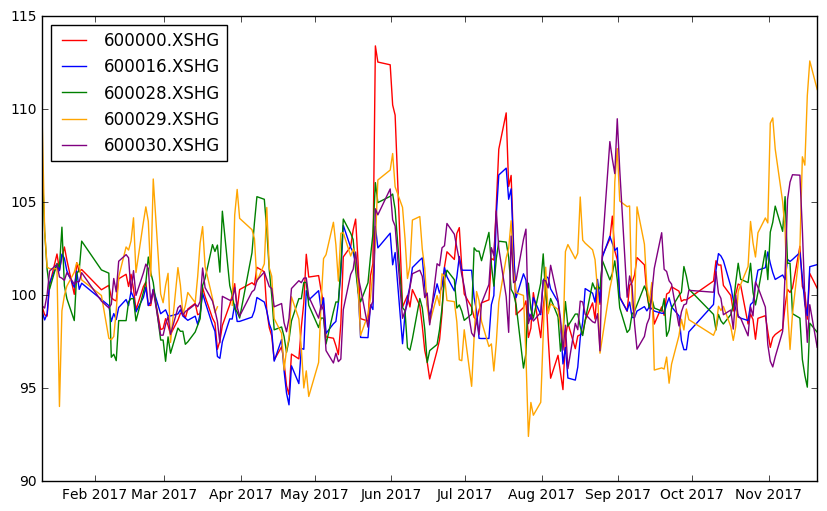

In [135]:
for key,value in data.items():
    try:
        index = value.index
        new_dict[key] = pd.Series(talib.ROCR100(value.close.values, timeperiod = 5), index = index)
    except AttributeError:
            pass
df = pd.DataFrame(new_dict)
list = df.columns.values.tolist()

fig = plt.figure(figsize=(10,6))
colors = ['red', 'blue', 'green', 'orange', 'purple']
for i in range(5):
    plt.plot(df[list[i]],label = list[i],color=colors[i])
plt.legend(loc='upper left')
plt.show()

# 第五题

用talib计算50只股票的周期为5的ROCR100，生成Dataframe，并将前5只股票的 ROCR100（参数timeperiod=20）用一张图显示出来。

In [13]:
data_dict = {}
for s in data.keys():
    if s != '600485.XSHG':
        stock =  pd.read_excel('sz50.xlsx',sheetname=s, index_col='datetime')
        data_dict[s] = stock.loc['2017-01-03':'2017-11-20']
PN = pd.Panel(data_dict)
df_ma = pd.DataFrame({name: talib.abstract.MA(value, 5) for name, value in PN.iteritems()})
pn_macd = pd.Panel({name: talib.abstract.MACD(value) for name, value in PN.iteritems()})
df_macd = pn_macd.transpose(2,1,0).to_frame().head()
print(df_macd)

C:\Users\70901\Anaconda3\lib\site-packages\pandas\io\excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


                                     macd  macdsignal  macdhist
datetime            minor                                      
2017-02-24 15:00:00 600000.XSHG  0.871114    1.197907 -0.326792
                    600016.XSHG -0.007077    0.265328 -0.272405
                    600028.XSHG  0.028081    0.052015 -0.023934
                    600029.XSHG  0.221787    0.132200  0.089587
                    600030.XSHG  0.602873    0.620235 -0.017362


C:\Users\70901\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2881: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\70901\Anaconda3\lib\site-packages\pandas\core\panel.py:1268: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  return super(Panel, self).transpose(*axes, **kwarg